In [81]:
import numpy as np
import pandas as pd
import os
import cv2
import matplotlib.pyplot as plt 
import seaborn as sns
import os
from PIL import Image
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.utils import to_categorical

In [82]:
THw_data = os.listdir('D:/cell_count/rawdata/THw/')
THp_data = os.listdir('D:/cell_count/rawdata/THp/')
CH_data = os.listdir('D:/cell_count/rawdata/CH/')
CH_1_data = os.listdir('D:/cell_count/rawdata/CH_1/')
noise_data = os.listdir('D:/cell_count/rawdata/noise/')

In [102]:
data = []
labels = []

for img in noise_data:
    try:
        img_read = plt.imread('D:/cell_count/rawdata/noise' + "/" + img)
        img_resize = cv2.resize(img_read, (60, 60))
        img_array = img_to_array(img_resize)
        img2 = np.fliplr(img_array)
        img3 = np.flipud(img_array)
        img4 = np.rot90(img_array)
        img5 = np.rot90(img2)
        data.append(img_array)
        data.append(img2)
        data.append(img3)
        data.append(img4)
        data.append(img5)
        labels.append(4)
        labels.append(4)
        labels.append(4)
        labels.append(4)
        labels.append(4)
    except:
        None

for img in CH_data:
    try:
        img_read = plt.imread('D:/cell_count/rawdata/CH' + "/" + img)
        img_resize = cv2.resize(img_read, (60, 60))
        img_array = img_to_array(img_resize)
        img2 = np.fliplr(img_array)
        img3 = np.flipud(img_array)
        img4 = np.rot90(img_array)
        img5 = np.rot90(img2)
        data.append(img_array)
        data.append(img2)
        data.append(img3)
        data.append(img4)
        data.append(img5)
        labels.append(3)
        labels.append(3)
        labels.append(3)
        labels.append(3)
        labels.append(3)
    except:
        None

for img in CH_1_data:
    try:
        img_read = plt.imread('D:/cell_count/rawdata/CH_1' + "/" + img)
        img_resize = cv2.resize(img_read, (60, 60))
        img_array = img_to_array(img_resize)
        img2 = np.fliplr(img_array)
        img3 = np.flipud(img_array)
        img4 = np.rot90(img_array)
        img5 = np.rot90(img2)
        data.append(img_array)
        data.append(img2)
        data.append(img3)
        data.append(img4)
        data.append(img5)
        labels.append(2)
        labels.append(2)
        labels.append(2)
        labels.append(2)
        labels.append(2)
    except:
        None

for img in THw_data:
    try:
        img_read = plt.imread('D:/cell_count/rawdata/THw' + "/" + img)
        img_resize = cv2.resize(img_read, (60, 60))
        img_array = img_to_array(img_resize)
        img2 = np.fliplr(img_array)
        img3 = np.flipud(img_array)
        img4 = np.rot90(img_array)
        img5 = np.rot90(img2)
        data.append(img_array)
        data.append(img2)
        data.append(img3)
        data.append(img4)
        data.append(img5)
        labels.append(1)
        labels.append(1)
        labels.append(1)
        labels.append(1)
        labels.append(1)
    except:
        None
        
for img in THp_data:
    try:
        img_read = plt.imread('D:/cell_count/rawdata/THp' + "/" + img)
        img_resize = cv2.resize(img_read, (60, 60))
        img_array = img_to_array(img_resize)
        img2 = np.fliplr(img_array)
        img3 = np.flipud(img_array)
        img4 = np.rot90(img_array)
        img5 = np.rot90(img2)
        data.append(img_array)
        data.append(img2)
        data.append(img3)
        data.append(img4)
        data.append(img5)
        labels.append(0)
        labels.append(0)
        labels.append(0)
        labels.append(0)
        labels.append(0)
    except:
        None
        
print(len(data),len(labels))

28425 28425


In [103]:
image_data = np.array(data)
labels = np.array(labels)
idx = np.arange(image_data.shape[0])
np.random.shuffle(idx)
image_data = image_data[idx]
labels = labels[idx]


In [115]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(image_data, labels, test_size = 0.2, random_state = 101)

In [117]:
y_train = to_categorical(y_train, num_classes = 5)
y_test = to_categorical(y_test, num_classes = 5)

In [118]:
print(f'SHAPE OF TRAINING IMAGE DATA : {x_train.shape}')
print(f'SHAPE OF TESTING IMAGE DATA : {x_test.shape}')
print(f'SHAPE OF TRAINING LABELS : {y_train.shape}')
print(f'SHAPE OF TESTING LABELS : {y_test.shape}')

SHAPE OF TRAINING IMAGE DATA : (22740, 60, 60, 3)
SHAPE OF TESTING IMAGE DATA : (5685, 60, 60, 3)
SHAPE OF TRAINING LABELS : (22740, 5)
SHAPE OF TESTING LABELS : (5685, 5)


In [88]:
import tensorflow.keras as keras
from tensorflow.keras.layers import Dense, Conv2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import MaxPooling2D, GlobalAveragePooling2D
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras import backend as K

from tensorflow.keras import optimizers

In [89]:
def CNNbuild(height, width, classes, channels):
    model = Sequential()
    
    inputShape = (height, width, channels)
    chanDim = -1
    
    if K.image_data_format() == 'channels_first':
        inputShape = (channels, height, width)
    model.add(Conv2D(64, (1,1), activation = 'relu', input_shape = inputShape))
    model.add(MaxPooling2D(2,2))
    model.add(BatchNormalization(axis = chanDim))
    model.add(Dropout(0.2))

    model.add(Conv2D(64, (3,3), activation = 'relu'))
    model.add(MaxPooling2D(2,2))
    model.add(BatchNormalization(axis = chanDim))
    model.add(Dropout(0.2))

    model.add(Conv2D(256, (1,1), activation = 'relu'))
    model.add(MaxPooling2D(2,2))
    model.add(BatchNormalization(axis = chanDim))
    model.add(Dropout(0.2))

    model.add(Flatten())
    
    model.add(Dense(512, activation = 'relu'))
    model.add(BatchNormalization(axis = chanDim))
    model.add(Dropout(0.5))
    model.add(Dense(classes, activation = 'softmax'))
    
    return model

In [107]:
height = 60
width = 60
classes = 5
channels = 3
model = CNNbuild(height = height, width = width, classes = classes, channels = channels)
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_28 (Conv2D)           (None, 60, 60, 64)        256       
_________________________________________________________________
max_pooling2d_26 (MaxPooling (None, 30, 30, 64)        0         
_________________________________________________________________
batch_normalization_33 (Batc (None, 30, 30, 64)        256       
_________________________________________________________________
dropout_33 (Dropout)         (None, 30, 30, 64)        0         
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 28, 28, 64)        36928     
_________________________________________________________________
max_pooling2d_27 (MaxPooling (None, 14, 14, 64)        0         
_________________________________________________________________
batch_normalization_34 (Batc (None, 14, 14, 64)        256       
__________

In [108]:
#compile the model
model.compile(loss = 'categorical_crossentropy', optimizer = 'Adam', metrics = ['accuracy'])

In [ ]:
h = model.fit(x_train, y_train, epochs = 100, batch_size = 100)

Epoch 1/100
22740/22740 [==============================] - 1021s 45ms/step - loss: 0.6141 - acc: 0.7128
Epoch 2/100
22740/22740 [==============================] - 912s 40ms/step - loss: 0.6057 - acc: 0.7243
Epoch 3/100
22740/22740 [==============================] - 882s 39ms/step - loss: 0.5957 - acc: 0.7270
Epoch 4/100
22740/22740 [==============================] - 884s 39ms/step - loss: 0.5959 - acc: 0.7286
Epoch 5/100
22740/22740 [==============================] - 884s 39ms/step - loss: 0.5840 - acc: 0.7325
Epoch 6/100
22740/22740 [==============================] - 880s 39ms/step - loss: 0.5812 - acc: 0.7341
Epoch 7/100
22740/22740 [==============================] - 878s 39ms/step - loss: 0.5826 - acc: 0.7298
Epoch 8/100
22740/22740 [==============================] - 888s 39ms/step - loss: 0.5668 - acc: 0.7434
Epoch 9/100
22740/22740 [==============================] - 882s 39ms/step - loss: 0.5700 - acc: 0.7397
Epoch 10/100
22740/22740 [==============================] - 891s 39ms/st

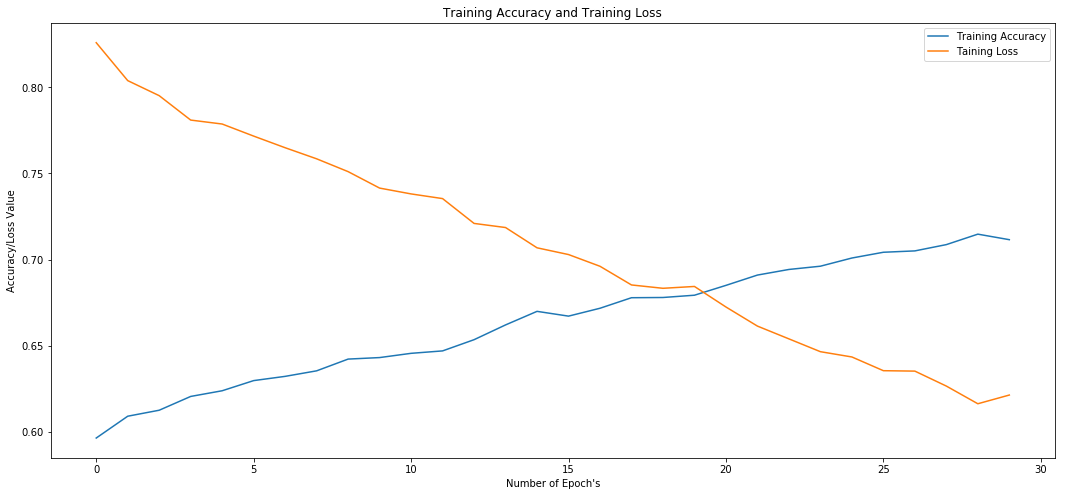

In [113]:
plt.figure(figsize = (18,8))
plt.plot(range(30), h.history['acc'], label = 'Training Accuracy')
plt.plot(range(30), h.history['loss'], label = 'Taining Loss')
#ax1.set_xticks(np.arange(0, 31, 5))
plt.xlabel("Number of Epoch's")
plt.ylabel('Accuracy/Loss Value')
plt.title('Training Accuracy and Training Loss')
plt.legend(loc = "best")

In [114]:
predictions = model.evaluate(x_test, y_test)
print(f'LOSS : {predictions[0]}')
print(f'ACCURACY : {predictions[1]}')

5685/5685 [==============================] - 38s 7ms/step
LOSS : 0.8639553112530771
ACCURACY : 0.6223394899905095
